## Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


## Data load 

In [20]:
# Data
df = pd.read_csv('data/df.csv')

In [627]:
df.head()

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Data exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [619]:
df.head()

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [620]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Preprocessing

In [11]:
def convert_dataframe(df):
    # Reemplazar valores en blanco o espacios vacíos con NaN
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    # Convertir columnas binarias
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
    df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
    df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
    df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
    df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
    df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
    df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

    # Convertir columnas categóricas con One-Hot Encoding
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

    # Eliminar columnas no numéricas o innecesarias
    df = df.drop(columns=['customer_id'])

    # Asegurarse de que todas las columnas sean numéricas
    df = df.apply(pd.to_numeric, errors='coerce')

    # Eliminar filas con valores NaN
    df.dropna(inplace=True)

    return df

# Cargar el dataframe completo
df = pd.read_csv('data/df.csv') 

# Convertir los datos (limpiar y transformar)
df_final = convert_dataframe(df)

In [35]:
# Balance
churn_counts = df_final['Churn'].value_counts()
churn_counts

Churn
0    5163
1    1869
Name: count, dtype: int64

In [12]:
# Dividir en Train y Test csv
dftrain, dftest = train_test_split(df_final, test_size=0.2, random_state=42)

# Guardar los dataframes en archivos CSV
dftrain.to_csv('data/train/train.csv', index=False)
dftest.to_csv('data/test/test.csv', index=False)

In [36]:
print(dftrain.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


# Análisis

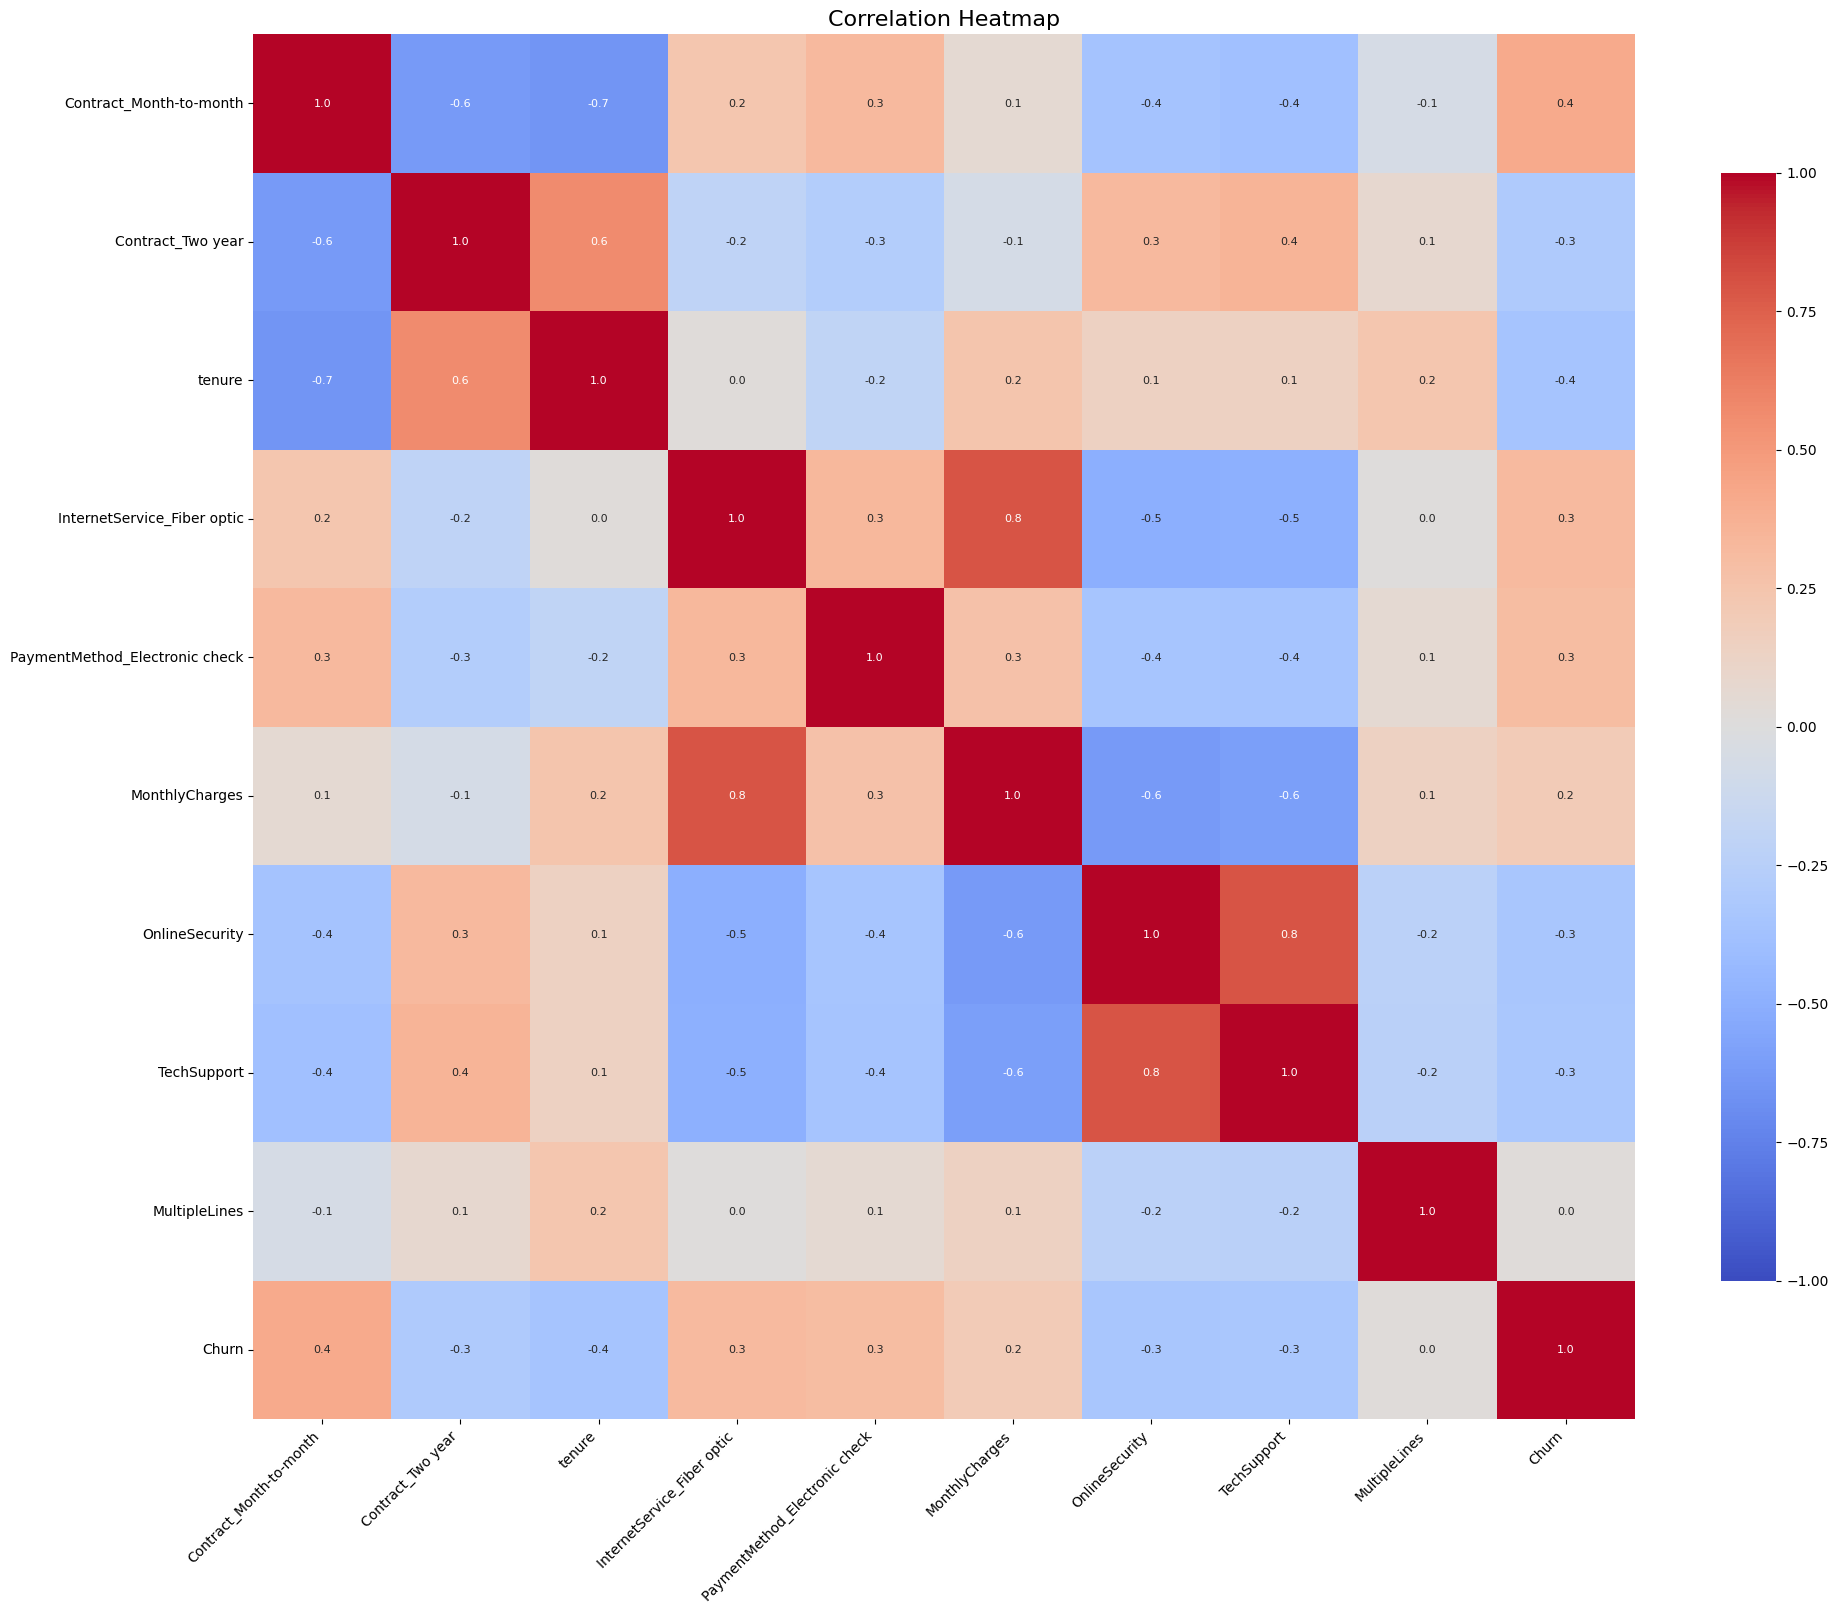

In [34]:
# Seleccionar las variables para el mapa de correlación
X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic', 
                   'PaymentMethod_Electronic check', 'MonthlyCharges', 'OnlineSecurity', 
                   'TechSupport', 'MultipleLines', 'Churn']]
y_train = dftrain['Churn']

# Calcular la matriz de correlación
corr_matrix = X_train.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 16))

# Generar el heatmap de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', vmin=-1, vmax=1,
            annot_kws={"size": 8}, cbar_kws={"shrink": .8})

# Rotar las etiquetas para una mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
# Ajustar el diseño para una mejor visibilidad
plt.tight_layout()

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

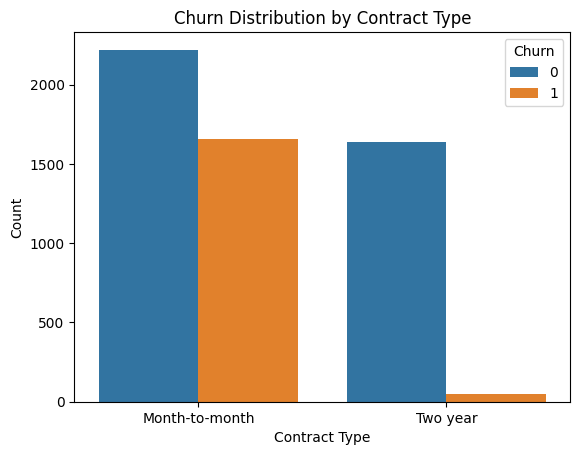

In [14]:
# Crear una nueva columna 'Contract' basada en las columnas One-Hot Encoded para Month-to-month y Two year
df_final['Contract'] = df_final.apply(
    lambda row: 'Month-to-month' if row['Contract_Month-to-month'] == 1 else ('Two year' if row['Contract_Two year'] == 1 else 'Other'),
    axis=1
)

# Filtrar solo Month-to-month y Two year
df_filtered = df_final[df_final['Contract'].isin(['Month-to-month', 'Two year'])]

# Gráfico
sns.countplot(x='Contract', hue='Churn', data=df_filtered)
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

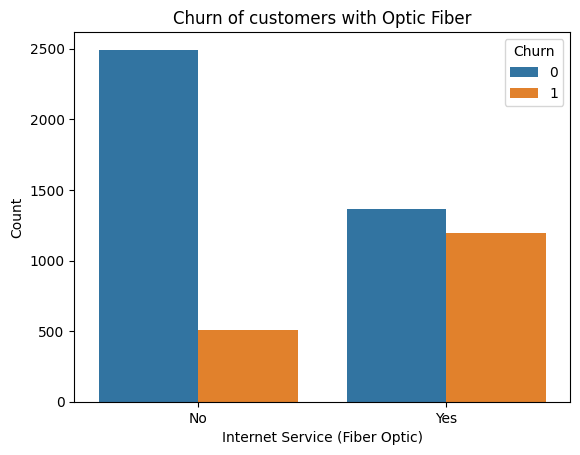

In [15]:
# Gráfico de barras para InternetService_Fiber optic
sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df_filtered)
plt.title('Churn of customers with Optic Fiber')
plt.xlabel('Internet Service (Fiber Optic)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Asumiendo que los valores son 0 y 1
plt.show()

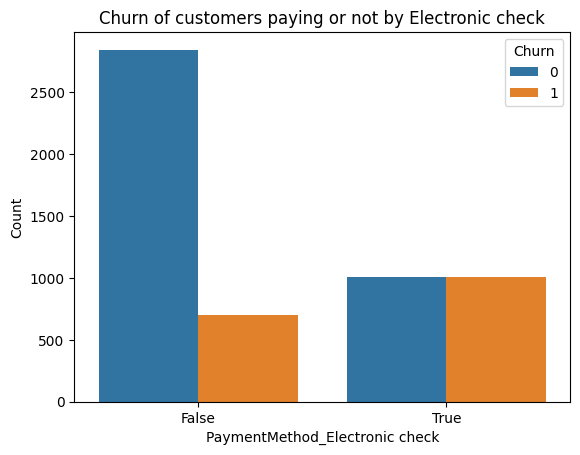

In [647]:
# Gráfico de barras para PaymentMethod
sns.countplot(x='PaymentMethod_Electronic check', hue='Churn', data=df_filtered)
plt.title('Churn of customers paying or not by Electronic check')
plt.xlabel('PaymentMethod_Electronic check')
plt.ylabel('Count')
plt.show()

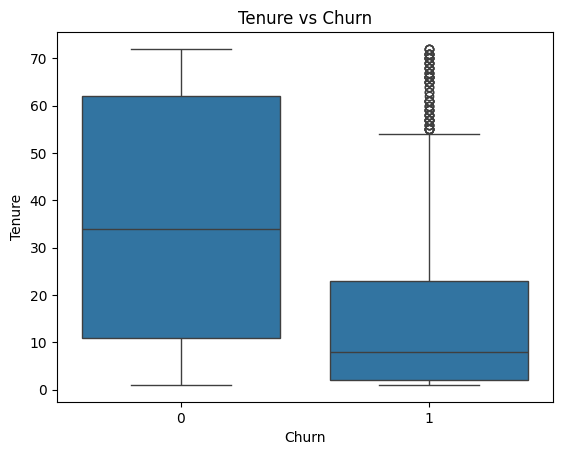

In [650]:
# Boxplot para tenure
sns.boxplot(x='Churn', y='tenure', data=df_filtered)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

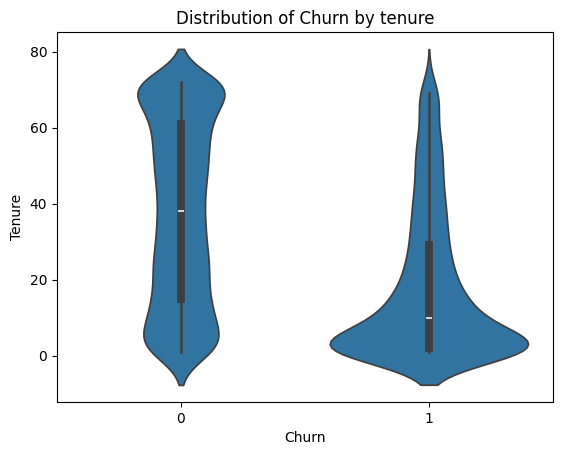

In [660]:
# Gráfica de violín para tenure
sns.violinplot(x='Churn', y='tenure', data=df_final)
plt.title('Distribution of Churn by tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

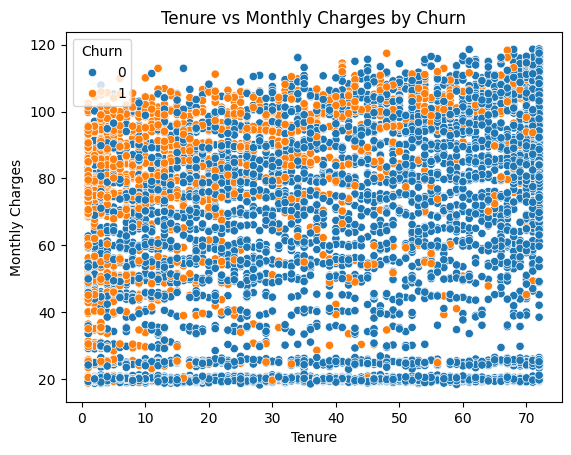

In [656]:
# Gráfica de dispersión para Tenure y MonthlyCharges
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df_final)
plt.title('Tenure vs Monthly Charges by Churn')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

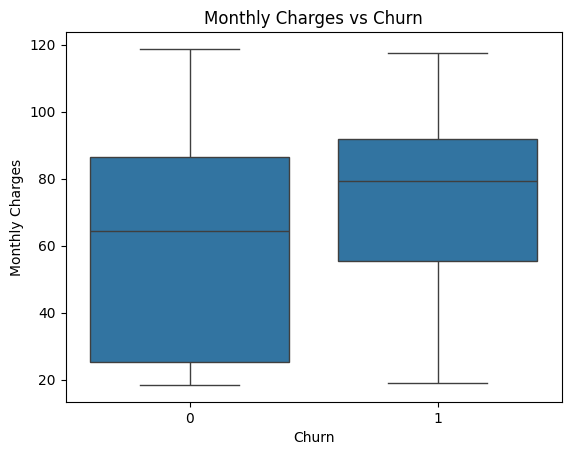

In [651]:
# Boxplot para MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_filtered)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

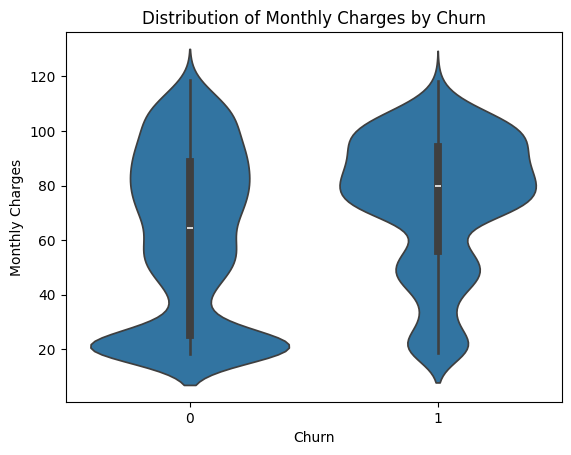

In [654]:
# Gráfica de violín para MonthlyCharges
sns.violinplot(x='Churn', y='MonthlyCharges', data=df_final)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [22]:
# Data
df = pd.read_csv('data/df.csv')

# Prueba Modelo NO Supervisado

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar los dataframes desde archivos CSV
dftrain = pd.read_csv('../data/train/train.csv')

# Seleccionar solo las variables predictoras, excluyendo la variable objetivo 'Churn'
X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                   'PaymentMethod_Electronic check', 'MonthlyCharges', 'OnlineSecurity',
                   'TechSupport', 'MultipleLines']]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Añadir las etiquetas de cluster al DataFrame original
dftrain['Cluster'] = kmeans.labels_

# Visualizar los clusters en dos componentes principales
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('K-Means Clustering on Principal Components')
plt.show()

In [ ]:
# Añadir la información de churn al DataFrame con los clusters
dftrain['Cluster'] = kmeans.labels_

# Calcular la proporción de churn en cada cluster
churn_by_cluster = dftrain.groupby('Cluster')['Churn'].mean()
print(churn_by_cluster)

# Visualizar la proporción de churn en cada cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=churn_by_cluster.index, y=churn_by_cluster.values)
plt.title('Proporción de Churn por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporción de Churn')
plt.show()

# Generar Clusters con K-Means

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar los dataframes desde archivos CSV
dftrain = pd.read_csv('../data/train/train.csv')
dftest = pd.read_csv('../data/test/test.csv')

# Separar variables predictoras y objetivo
X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                   'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                   'TechSupport', 'MultipleLines']]
y_train = dftrain['Churn']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Añadir las etiquetas de cluster al DataFrame de entrenamiento
dftrain['Cluster'] = kmeans.labels_

# Hacer lo mismo para el conjunto de prueba
X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                 'TechSupport', 'MultipleLines']]
X_test_scaled = scaler.transform(X_test)
dftest['Cluster'] = kmeans.predict(X_test_scaled)
y_test = dftest['Churn']

# Entrenar Modelo Supervisado con Clusters

In [ ]:
# Entrenar Modelo Supervisado con Clusters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Seleccionar las variables predictoras incluyendo el cluster
X_train_with_cluster = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                                'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                                'TechSupport', 'MultipleLines', 'Cluster']]

X_test_with_cluster = dftest[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                              'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                              'TechSupport', 'MultipleLines', 'Cluster']]

# Definir el pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Entrenar el modelo
pipeline.fit(X_train_with_cluster, y_train)
y_pred = pipeline.predict(X_test_with_cluster)

# Evaluar el modelo
print("Logistic Regression with Clusters Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression with Clusters Classification Report:\n", classification_report(y_test, y_pred))

# Prueba Modelos Supervisados

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Crear y entrenar el modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

# Evaluar el modelo
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

In [ ]:
# Decision Tree con Pipeline de Normalización y Balanceo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Cargar los dataframes desde archivos CSV
dftrain = pd.read_csv('../data/train/train.csv')
dftest = pd.read_csv('../data/test/test.csv')

# Separar variables predictoras y variable objetivo
X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                   'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                   'TechSupport', 'MultipleLines']]
y_train = dftrain['Churn']
X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                 'TechSupport', 'MultipleLines']]
y_test = dftest['Churn']

# Crear y entrenar el modelo
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
# Random Forest con Pipeline de Normalización y Balanceo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Cargar los dataframes desde archivos CSV
dftrain = pd.read_csv('../data/train/train.csv')
dftest = pd.read_csv('../data/test/test.csv')

# Separar variables predictoras y variable objetivo
X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                   'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                   'TechSupport', 'MultipleLines']]
y_train = dftrain['Churn']
X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                 'TechSupport', 'MultipleLines']]
y_test = dftest['Churn']

# Crear y entrenar el modelo
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Gradient Boosting
from xgboost import XGBClassifier

# Crear y entrenar el modelo
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

In [ ]:
# Gradient Boosting con Pipeline de Normalización y Balanceo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Cargar los dataframes desde archivos CSV
dftrain = pd.read_csv('../data/train/train.csv')
dftest = pd.read_csv('../data/test/test.csv')

# Separar variables predictoras y variable objetivo
X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                   'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                   'TechSupport', 'MultipleLines']]
y_train = dftrain['Churn']
X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                 'TechSupport', 'MultipleLines']]
y_test = dftest['Churn']

# Crear y entrenar el modelo
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Máquinas de soporte vectorial
from sklearn.svm import SVC

# Crear y entrenar el modelo
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
# Máquinas de soporte vectorial con Pipeline y Balanceo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Cargar los dataframes desde archivos CSV
dftrain = pd.read_csv('../data/train/train.csv')
dftest = pd.read_csv('../data/test/test.csv')

# Separar variables predictoras y variable objetivo
X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                   'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                   'TechSupport', 'MultipleLines']]
y_train = dftrain['Churn']
X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                 'TechSupport', 'MultipleLines']]
y_test = dftest['Churn']

# Crear y entrenar el modelo
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Red Neuronal Artificial multicapa (ANN)
from sklearn.neural_network import MLPClassifier

# Crear y entrenar el modelo
ann_model = MLPClassifier(random_state=42, max_iter=1000)
ann_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_ann = ann_model.predict(X_test)

# Evaluar el modelo
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("ANN Classification Report:\n", classification_report(y_test, y_pred_ann))

In [ ]:
# Redes Neuronales Artific iales (ANN) con Pipeline de Normalizacion y Balanceo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Cargar los dataframes desde archivos CSV
dftrain = pd.read_csv('../data/train/train.csv')
dftest = pd.read_csv('../data/test/test.csv')

# Separar variables predictoras y variable objetivo
X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                   'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                   'TechSupport', 'MultipleLines']]
y_train = dftrain['Churn']
X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic',
                 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
                 'TechSupport', 'MultipleLines']]
y_test = dftest['Churn']

# Crear y entrenar el modelo
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(random_state=42, max_iter=1000))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print("ANN Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Red Neuronal Multicapa con ajuste de Hiperparámetros y control del Overfitting
from sklearn.neural_network import MLPClassifier

# Crear y entrenar el modelo ANN
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000, alpha=0.01)
ann_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_ann = ann_model.predict(X_test)

# Evaluar el modelo
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("ANN Classification Report:\n", classification_report(y_test, y_pred_ann))

from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, scoring='recall', cv=3, verbose=2)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de parámetros: {best_params}')

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_ann_model = grid_search.best_estimator_
y_pred_best_ann = best_ann_model.predict(X_test)

print("Best ANN Accuracy:", accuracy_score(y_test, y_pred_best_ann))
print("Best ANN Classification Report:\n", classification_report(y_test, y_pred_best_ann))

In [ ]:
# Regresión logística
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)

# Evaluar el modelo
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

In [ ]:
# Logistic Regression con Pipeline de Normalización, Balanceo y ajuste de Hiperparametros
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Definir el grid de hiperparámetros
param_grid = {
    'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0],  # Más estrategias de muestreo
    'smote__k_neighbors': [3, 5, 7, 9, 11],  # Rango más amplio de vecinos
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Rango más amplio de C
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Incluir más penalizaciones
    'classifier__solver': ['lbfgs', 'saga', 'liblinear']  # Incluir más solvers
}
# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, scoring='recall', refit=True, verbose=2, cv=3)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de parámetros: {best_params}')
# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Logistic Regression with SMOTE Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression with SMOTE Classification Report:\n", classification_report(y_test, y_pred))


# Comparativa Modelos

In [37]:
# Resultados
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM', 'ANN'],
    'Accuracy': [0.73, 0.78, 0.78, 0.79, 0.78, 0.78],
    'Recall': [0.50, 0.46, 0.50, 0.52, 0.38, 0.35],
    'F1-Score': [0.50, 0.52, 0.54, 0.56, 0.48, 0.46]
}

# Convertir a DataFrame
df_results = pd.DataFrame(results)

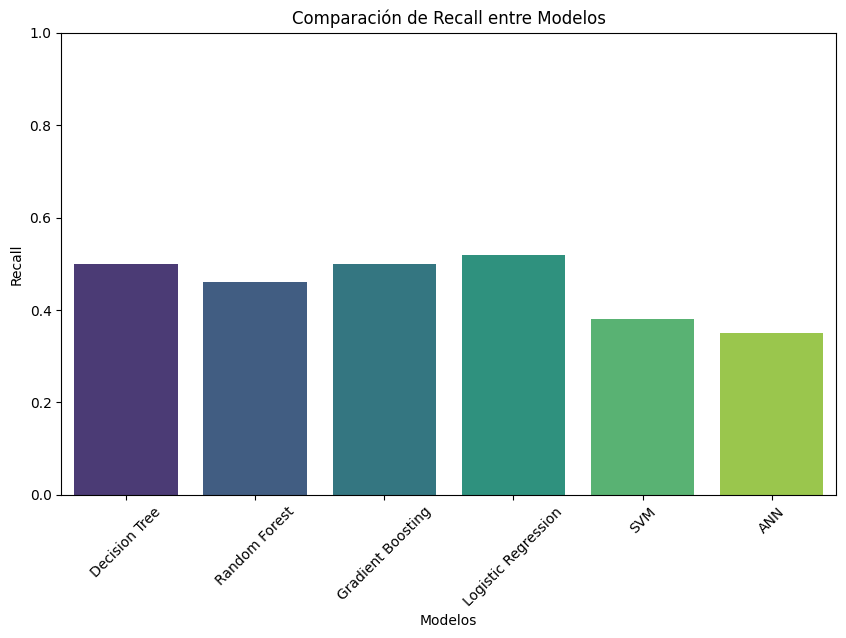

In [39]:
# Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=df_results, palette='viridis')
plt.title('Comparación de Recall entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

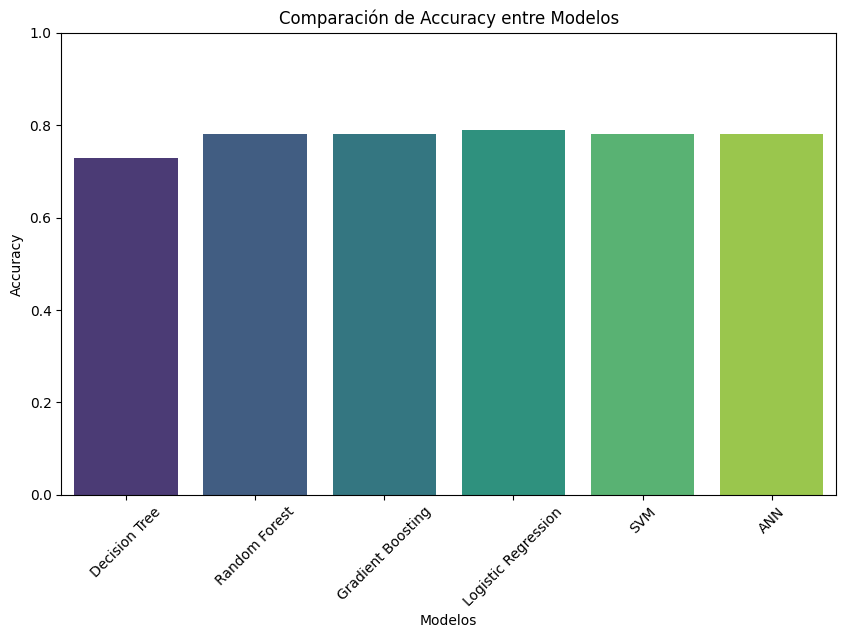

In [38]:
# Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_results, palette='viridis')
plt.title('Comparación de Accuracy entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

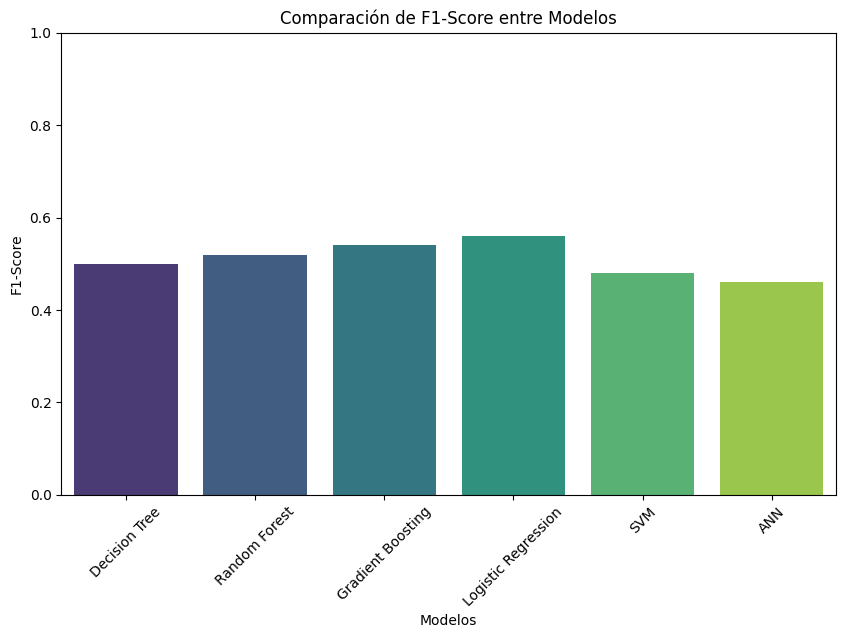

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=df_results, palette='viridis')
plt.title('Comparación de F1-Score entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Comparativa Modelos con Pipeline de Regularización y Balanceo

In [41]:
# Resultados Pipeline Regularizacion y Balanceo
results = {
    'Model N&B': ['Decision Tree N&B', 'Random Forest N&B', 'Gradient Boosting N&B', 'Logistic Regression N&B', 'SVM N&B', 'ANN N&B'],
    'Accuracy': [0.72, 0.75, 0.75, 0.69, 0.75, 0.76],
    'Recall': [0.57, 0.58, 0.63, 0.83, 0.70, 0.66],
    'F1-Score': [0.52, 0.55, 0.57, 0.58, 0.60, 0.59]
}

# Convertir a DataFrame
df_results = pd.DataFrame(results)

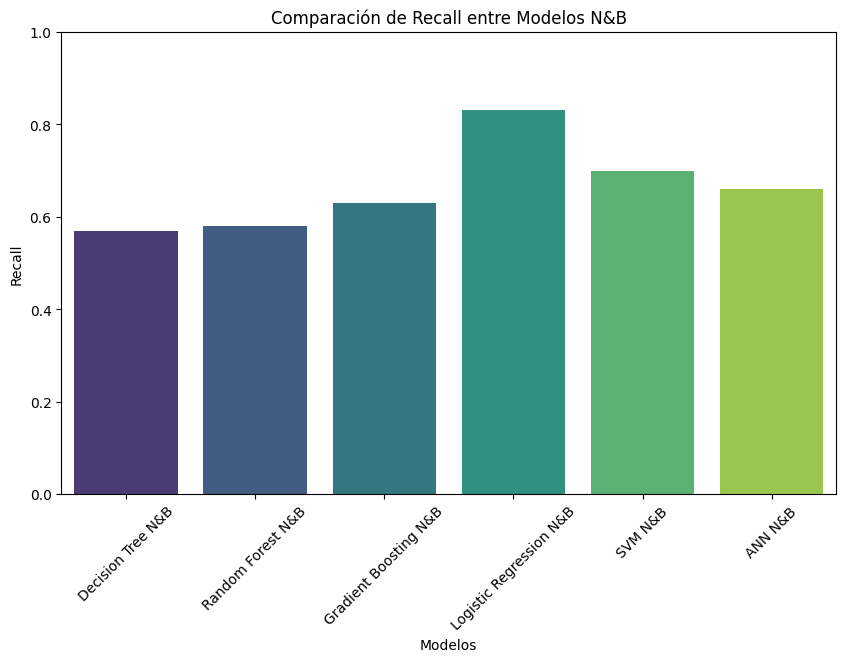

In [43]:
# Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Model N&B', y='Recall', data=df_results, palette='viridis')
plt.title('Comparación de Recall entre Modelos N&B')
plt.xlabel('Modelos')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

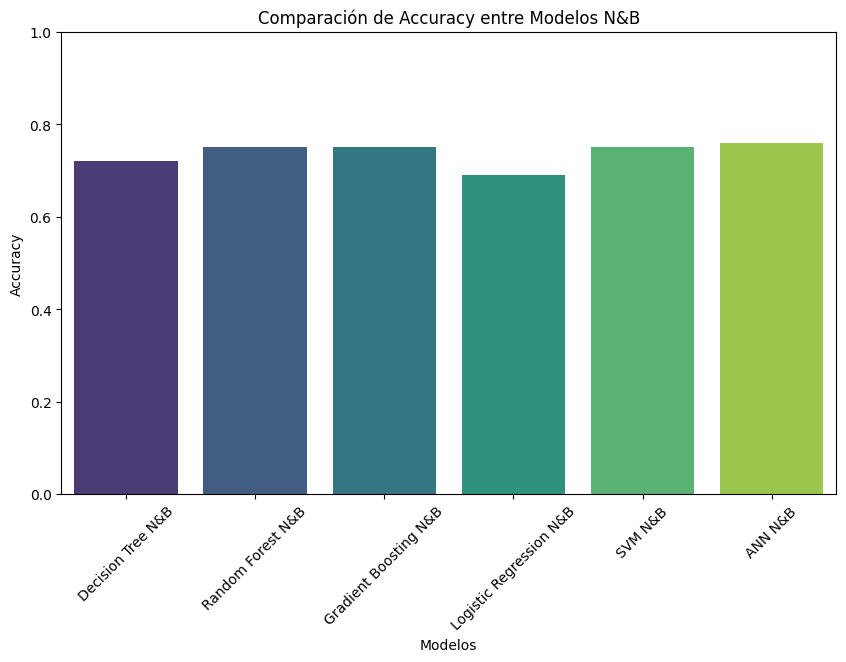

In [42]:
# Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model N&B', y='Accuracy', data=df_results, palette='viridis')
plt.title('Comparación de Accuracy entre Modelos N&B')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

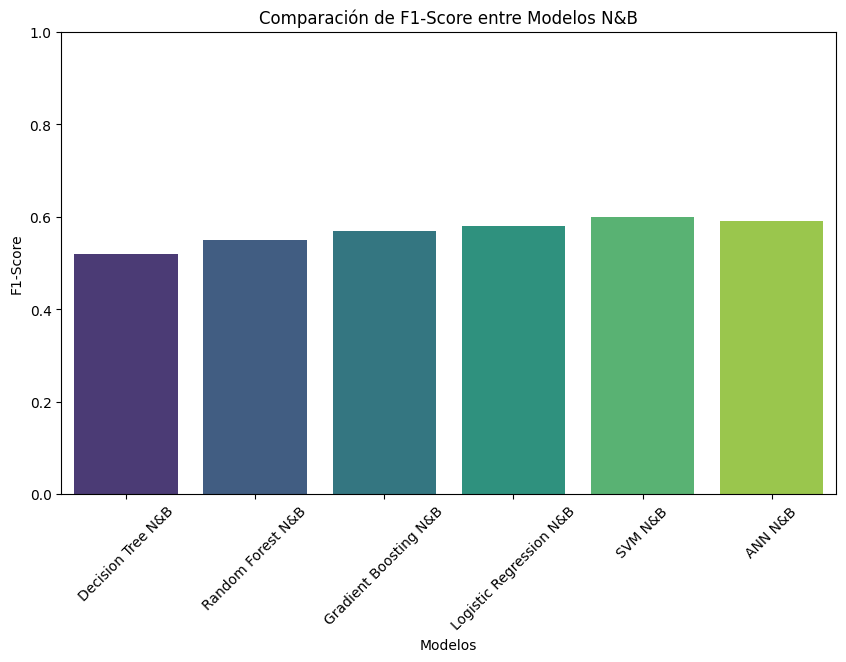

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model N&B', y='F1-Score', data=df_results, palette='viridis')
plt.title('Comparación de F1-Score entre Modelos N&B')
plt.xlabel('Modelos')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# MODELO FINAL

In [21]:
# Separar variables predictoras y variable objetivo
X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 
                   'OnlineSecurity', 'TechSupport', 'MultipleLines']]# ACCURACY 0.79, PRECISION 0.83, RECALL: 0.91(GBC)
y_train = dftrain['Churn']
X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 
                 'OnlineSecurity', 'TechSupport', 'MultipleLines']]# ACCURACY 0.79, PRECISION 0.83, RECALL: 0.91(GBC)
y_test = dftest['Churn']

# Separar cvariables predictoras y variable objetivo
#X_train = dftrain.drop('Churn', axis=1) MEJOR OPCION POR EL MOMENTO
#X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'Contract_One year', 'tenure']]# ACCURACY 0.75, PRECISION 0.79, RECALL: 0.90(GBC)
#X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'Contract_One year', 'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges']]# ACCURACY 0.78, PRECISION 0.83, RECALL: 0.89(GBC)
#X_train = dftrain[['Contract_Month-to-month', 'Contract_Two year', 'Contract_One year', 'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Dependents', 'Partner']]# ACCURACY 0.79, PRECISION 0.82, RECALL: 0.90(GBC)
#y_train = dftrain['Churn']
#X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'Contract_One year', 'tenure']]# ACCURACY 0.75, PRECISION 0.79, RECALL: 0.90(GBC)
#X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'Contract_One year', 'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges']]# ACCURACY 0.78, PRECISION 0.83, RECALL: 0.89(GBC)
#X_test = dftest[['Contract_Month-to-month', 'Contract_Two year', 'Contract_One year', 'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'TotalCharges',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Dependents', 'Partner']]# ACCURACY 0.79, PRECISION 0.82, RECALL: 0.90(GBC)
#y_test = dftest['Churn']

# Modelo Final de Regresión Logística Balanceado y con ajuste de hiperparámetros

In [ ]:
# MODELO FINAL: Logistic Regression con Pipeline de Normalización y Balanceo
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Definir el grid de hiperparámetros mejorado
param_grid = {
    'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0],  # Más estrategias de muestreo
    'smote__k_neighbors': [3, 5, 7, 9, 11, 13],  # Rango más amplio de vecinos
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],  # Rango más amplio de C
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],  # Incluir más penalizaciones
    'classifier__solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']  # Incluir más solvers
}

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, scoring='recall', refit=True, verbose=2, cv=3)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de parámetros: {best_params}')

# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Logistic Regression with SMOTE Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression with SMOTE Classification Report:\n", classification_report(y_test, y_pred))

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=skf, scoring='recall')
print(f'Puntuaciones de validación cruzada (recall): {cv_scores}')
print(f'Media de las puntuaciones (recall): {cv_scores.mean()}')

In [29]:
# Guardar el modelo en un archivo pickle
with open('models/best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Modelo guardado como 'best_model.pkl'")

Modelo guardado como 'best_model.pkl'


# Confusion Matrix

Dimensiones de y_test: (1407,)
Dimensiones de y_pred: (1407,)


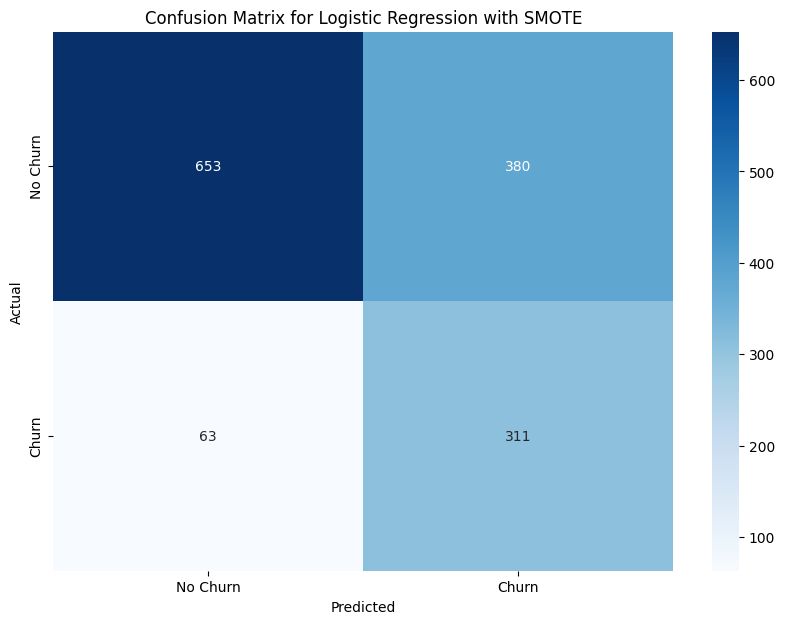

In [33]:
# Predicciones
y_pred = best_model.predict(X_test)

# Verificar las dimensiones
print(f"Dimensiones de y_test: {y_test.shape}")
print(f"Dimensiones de y_pred: {y_pred.shape}")

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with SMOTE')
plt.show()

In [30]:
# Cargar el modelo desde el archivo pickle
with open('models/best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Usar el modelo cargado para predecir
new_predictions = loaded_model.predict(X_test)

print("New Predictions Accuracy:", accuracy_score(y_test, new_predictions))
print("New Predictions Classification Report:\n", classification_report(y_test, new_predictions))

New Predictions Accuracy: 0.6851457000710732
New Predictions Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.63      0.75      1033
           1       0.45      0.83      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.79      0.69      0.70      1407



In [31]:
# Probar con un usuario
with open('models/best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test[0:1])